### 📘 Lesson 4: Introduction to GeoPandas

<div style="display: flex; align-items: center; justify-content: space-between;">
  <div>
    <h3>Notebook Developers</h3>
    <ul>
      <li><strong>Dr. Fabrizio Finozzi</strong> - Big Data Software Developer</li>
      <li><strong>Priyesh Gosai</strong> - Energy Systems Modeler and Training Coordinator</li>
    </ul>
  </div>
  <div>
    <a href="https://openenergytransition.org/index.html">
      <img src="https://openenergytransition.org/assets/img/oet-logo-red-n-subtitle.png" height="60" alt="OET">
    </a>
  </div>
</div>

##### 🎯 Learning Objectives  

* Understand the fundamentals of GeoPandas and its role in geospatial data analysis.
* Explore and analyze the core data structures used in GeoPandas for handling spatial data.
* Learn how to process, manipulate, and visualize geospatial information using GeoPandas.

### What is GeoPandas
---


GeoPandas extends the functionalities of Pandas to geospatial data, which is time-based data that is related to a location on the surface of Earth.

#### Data structure

The basic data structure provided by GeoPandas are `GeoSeries` and `GeoDataFrame`. A `GeoDataFrame` is a subclass of Pandas `DataFrame`, that can store geometry columns and perform spatial operations. The basic structure of `GeoDataFrame` is shown below

<img src="images/geodataframe.png" width="500">


There are two main `models` (i.e. a simplified version of the represented objects) for storing geospatial data
- vector
- raster

#### Vector

A `vector` data model stores locations as discrete geometric objects. The ones available are shown in the image below taken from this [link](https://r-spatial.org/book/03-Geometries.html). For example, a `POINT()` is represented by a longitude and latitude coordinate pair, whereas a `POLYGON` is a set of `POINT()` that delimit a closed area.


<img src="images/geometry.png" width="500">

Areas are occasionally represented with a `centroid`, which is the point that is mathematically equidistant from all points of the area.

#### Raster

Raster data is instead stored on a grid of pixels. Each pixel encodes the necessary properties that characterize the given area, as elevation or temperature.

#### Working with geospatial information

Geospatial information are usually contained in files with format `GeoPackage`, `GeoJSON` or `Shapefile`. Such files can be read in with the command below. 

The command detects the filetype and reads the data into a `GeoDataFrame`. The file below contains the shapes of all countries taken from [Natural Earth](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/).


Natural Earth is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software.

### Mapping SAPP
---

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic


In [ ]:
# Load the shapefile
shape_file_path = pathlib.Path(pathlib.Path.cwd(), "shapes", "ne_110m_admin_0_countries.shp")
gdf = gpd.read_file(shape_file_path)


Lets look at the `gdf` object contains a variety of data for each country. 

In [3]:
for i in range(len(gdf.columns)):
    print(f"{gdf.columns[i]}")

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
TLC
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
POP_YEAR
GDP_MD
GDP_YEAR
ECONOMY
INCOME_GRP
FIPS_10
ISO_A2
ISO_A2_EH
ISO_A3
ISO_A3_EH
ISO_N3
ISO_N3_EH
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_ISO
ADM0_DIFF
ADM0_TLC
ADM0_A3_US
ADM0_A3_FR
ADM0_A3_RU
ADM0_A3_ES
ADM0_A3_CN
ADM0_A3_TW
ADM0_A3_IN
ADM0_A3_NP
ADM0_A3_PK
ADM0_A3_DE
ADM0_A3_GB
ADM0_A3_BR
ADM0_A3_IL
ADM0_A3_PS
ADM0_A3_SA
ADM0_A3_EG
ADM0_A3_MA
ADM0_A3_PT
ADM0_A3_AR
ADM0_A3_JP
ADM0_A3_KO
ADM0_A3_VN
ADM0_A3_TR
ADM0_A3_ID
ADM0_A3_PL
ADM0_A3_GR
ADM0_A3_IT
ADM0_A3_NL
ADM0_A3_SE
ADM0_A3_BD
ADM0_A3_UA
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
LABEL_X
LABEL_Y
NE_ID
WIKIDA

The `gdf` object is a dataframe containing a variety of data related to each country. 

* Population 
* GDP 
* ISO Code names 
* ... and many more.

We can see all the countries in Africa represented in the data set. 

In [4]:
gdf[['NAME','POP_EST','GDP_MD','ISO_A2','CONTINENT']]

,NAME,POP_EST,GDP_MD,ISO_A2,CONTINENT
0,Fiji,889953.0,5496,FJ,Oceania
1,Tanzania,58005463.0,63177,TZ,Africa
2,W. Sahara,603253.0,907,EH,Africa
3,Canada,37589262.0,1736425,CA,North America
4,United States of America,328239523.0,21433226,US,North America
...,...,...,...,...,...
172,Serbia,6944975.0,51475,RS,Europe
173,Montenegro,622137.0,5542,ME,Europe
174,Kosovo,1794248.0,7926,-99,Europe
175,Trinidad and Tobago,1394973.0,24269,TT,North America


We can filter countries by any column.

In [5]:
print(gdf[gdf["CONTINENT"] == "Africa"]["NAME"].unique())


['Tanzania' 'W. Sahara' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad'
 'South Africa' 'Lesotho' 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali'
 'Mauritania' 'Benin' 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana'
 "Côte d'Ivoire" 'Guinea' 'Guinea-Bissau' 'Liberia' 'Sierra Leone'
 'Burkina Faso' 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea'
 'Zambia' 'Malawi' 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Madagascar'
 'Gambia' 'Tunisia' 'Algeria' 'Eritrea' 'Morocco' 'Egypt' 'Libya'
 'Ethiopia' 'Djibouti' 'Somaliland' 'Uganda' 'Rwanda' 'S. Sudan']


Now lets look at Zimbabwe. 

In [6]:
zw_gdf = gdf[gdf["NAME"] == "Zimbabwe"]

If we look at the geometry of Zimbabwe, we can see that it is a polygon with multiple parts.

In [7]:
zw_gdf[["NAME", "geometry"]]

,NAME,geometry
48,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


We can plot the geometry. 

<Axes: >

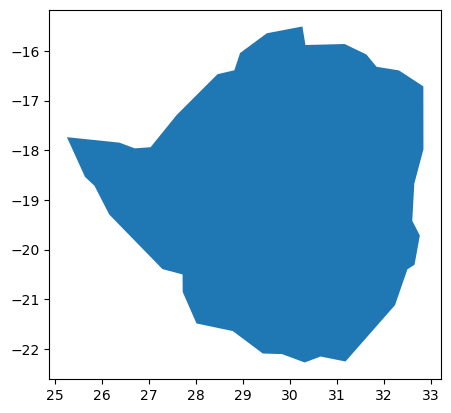

In [8]:
zw_gdf.plot()

We can also define a list of countries such as each power pool. 

In [ ]:
# Define SAPP countries
sapp_countries = [
    "Angolimport pandas as pda", "Botswana", "Democratic Republic of the Congo", "Eswatini", "Lesotho",
    "Malawi", "Mozambique", "Namibia", "South Africa", "Tanzania", "Zambia", "Zimbabwe"
]


In [10]:
sapp_gdf = gdf[gdf['NAME'].isin(sapp_countries)]

We can plot the polygons. 

<Axes: >

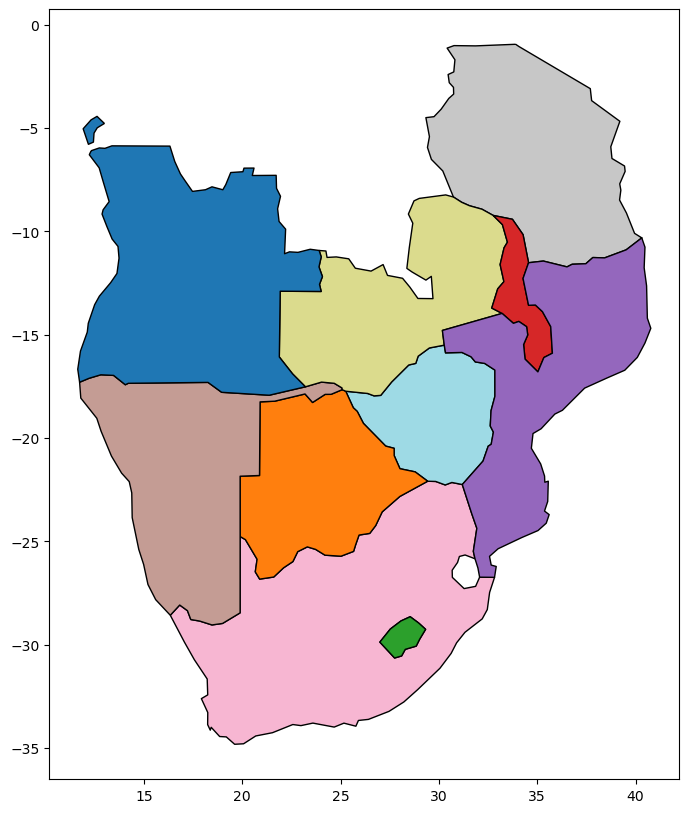

In [11]:
sapp_gdf.plot(column="NAME", cmap="tab20", edgecolor="black", figsize=(10, 10))


Or color the countries by shape. 

<Axes: >

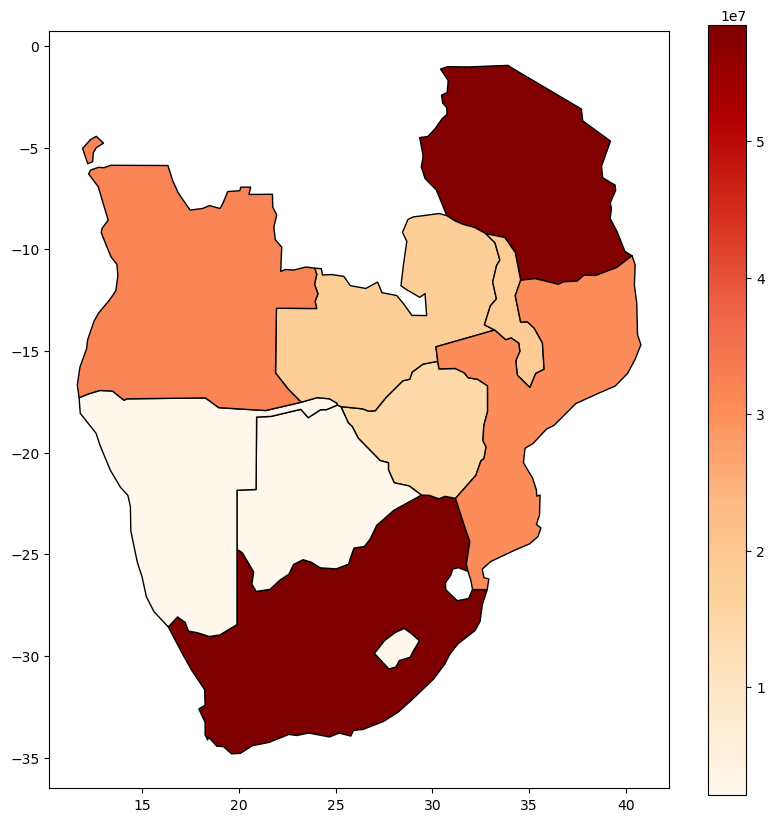

In [12]:
sapp_gdf.plot(column="POP_EST", cmap="OrRd", edgecolor="black", figsize=(10, 10), legend=True)


We have created three objects for each power pool. 

The next task is to overlay all the power plants in the region. 

So we import a dataset of power plants. 

In [ ]:
plant_data = pathlib.Path(pathlib.Path.cwd(), "data", "powerplants.csv")

df_power_plant = pd.read_csv(plant_data,index_col=0)

In [14]:
df_power_plant.head()

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,DateIn,DateRetrofit,DateOut,lat,lon,EIC,projectID,bus
1,Koeberg,Nuclear,Steam Turbine,PP,ZA,1940.0,NaN,NaN,0.0,0.0,0.0,1984.0,1984.0,2034.0,-33.6746,18.43210,"{nan, nan}","{'GNPT': {'G500317', 'G500318'}, 'GEO': {'GEO-...",1560
2,Nkula,Hydro,Reservoir,PP,MW,100.0,NaN,NaN,0.0,0.0,0.0,1966.0,1966.0,2066.0,-15.5269,34.81920,{nan},"{'GHPT': {'G602462'}, 'GEO': {'GEO-40388'}, 'G...",312
3,Kapichira,Hydro,Reservoir,PP,MW,130.0,NaN,NaN,0.0,0.0,0.0,2000.0,2000.0,2100.0,-15.8954,34.75310,{nan},"{'GHPT': {'G602459'}, 'GEO': {'GEO-40390'}, 'G...",341
4,Zongo,Hydro,Run-Of-River,PP,CD,225.0,NaN,NaN,0.0,0.0,0.0,1955.0,1955.0,2055.0,-4.7823,14.90445,"{nan, nan}","{'GHPT': {'G601505', 'G601504'}, 'GEO': {'GEO-...",1518
5,Zilo,Hydro,Reservoir,PP,CD,108.0,NaN,NaN,0.0,0.0,0.0,1952.0,1952.0,2052.0,-10.4998,25.46310,{nan},"{'GHPT': {'G601501'}, 'GEO': {'GEO-42626'}, 'G...",2493


In [ ]:
# Convert df_power_plant to GeoDataFrame
gdf_power_plants = gpd.GeoDataFrame(
    df_power_plant,
    geometry=gpd.points_from_xy(df_power_plant["lon"], df_power_plant["lat"]),
    crs="EPSG:4326"
)

# Spatial join: filter plants within SAPP region
plants_in_sapp = gpd.sjoin(gdf_power_plants, sapp_gdf, how="inner", predicate="within")


In [16]:
plants_in_sapp 

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,Duration,Volume_Mm3,DamHeight_m,...,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA
1,Koeberg,Nuclear,Steam Turbine,PP,ZA,1940.0,NaN,NaN,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
2,Nkula,Hydro,Reservoir,PP,MW,100.0,NaN,NaN,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
3,Kapichira,Hydro,Reservoir,PP,MW,130.0,NaN,NaN,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
7,Victoria Falls,Hydro,Run-Of-River,PP,ZM,108.0,NaN,NaN,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
8,Kariba Dam,Hydro,Reservoir,PP,ZM,2130.0,NaN,NaN,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Zhongxin,Hard Coal,Steam Turbine,PP,ZW,320.0,NaN,NaN,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
291,Caculo Cabaca,Hydro,Run-Of-River,PP,AO,2040.0,NaN,NaN,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
292,Julius Nyerere,Hydro,Reservoir,PP,TZ,2115.0,NaN,NaN,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
293,Kafue Gorge Lower,Hydro,Reservoir,PP,ZM,750.0,NaN,NaN,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None


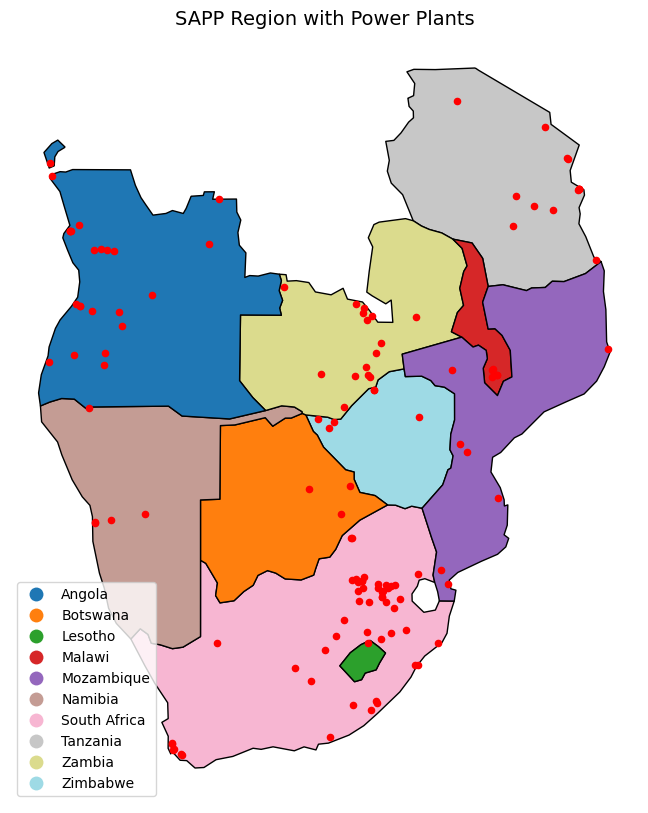

In [ ]:
# Plot map
ax = sapp_gdf.plot(column="NAME", cmap="tab20", edgecolor="black", figsize=(10, 10), legend=True)
plants_in_sapp.plot(ax=ax, color="red", markersize=20)

# Improve appearance
plt.title("SAPP Region with Power Plants", fontsize=14)
plt.axis("off")
plt.show()


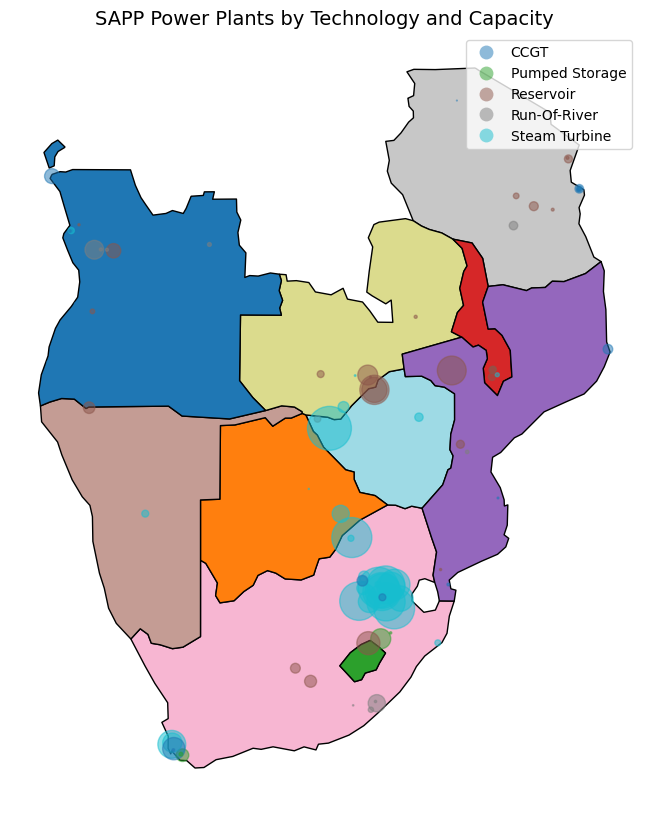

In [ ]:
# Set up plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot SAPP countries
sapp_gdf.plot(column="NAME", cmap="tab20", edgecolor="black", ax=ax, legend=False)

# Normalize capacity for dot size (adjust scale if needed)
size = plants_in_sapp["Capacity"] / plants_in_sapp["Capacity"].max() * 1000

# Plot power plants: size by capacity, color by technology
plants_in_sapp.plot(
    ax=ax,
    column="Technology",       # Color by technology type
    markersize=size,
    alpha=0.5,
    legend=True
)

# Final touches
plt.title("SAPP Power Plants by Technology and Capacity", fontsize=14)
plt.axis("off")
plt.show()


In [ ]:
def distance_between_plants(df, plant_name_1, plant_name_2):
    """
    Calculate the geodesic distance between two power plants by their names.

    Parameters:
        df (DataFrame): The DataFrame or GeoDataFrame with 'Name', 'latitude', and 'longitude'.
        plant_name_1 (str): Name of the first power plant.
        plant_name_2 (str): Name of the second power plant.

    Returns:
        float: Distance in kilometers between the two plants.
    """
    try:
        # Get coordinates of both plants
        p1 = df[df["Name"] == plant_name_1].iloc[0]
        p2 = df[df["Name"] == plant_name_2].iloc[0]
        
        coord1 = (p1["lat"], p1["lon"])
        coord2 = (p2["lat"], p2["lon"])

        return geodesic(coord1, coord2).kilometers
    
    except IndexError:
        raise ValueError("One or both plant names not found in the dataset.")


In [20]:
dist_km = distance_between_plants(plants_in_sapp, "Koeberg", "Duvha")
print(f"Distance: {dist_km:.2f} km")


Distance: 1355.93 km


In [ ]:
# Reproject to a projected CRS before calculating centroids
sapp_gdf_proj = sapp_gdf.to_crs(epsg=3395)  # World Mercator
center_lat = sapp_gdf_proj.geometry.centroid.to_crs(epsg=4326).y.mean()
center_lon = sapp_gdf_proj.geometry.centroid.to_crs(epsg=4326).x.mean()



m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=4,
    min_zoom=3,
    max_zoom=6,
    max_bounds=True
)

folium.GeoJson(
    sapp_gdf,
    name="SAPP Countries",
    style_function=lambda x: {
        "fillColor": "#cccccc",
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.3
    },
    tooltip=folium.GeoJsonTooltip(fields=["NAME"], aliases=["Country:"])
).add_to(m)

tooltip_columns = ["Name", "Technology", "Capacity"]
marker_cluster = MarkerCluster(name="Power Plants").add_to(m)

# Normalize capacity for marker size
cap_norm = plants_in_sapp["Capacity"] / plants_in_sapp["Capacity"].max()

for idx, row in plants_in_sapp.iterrows():
    tooltip_html = "<br>".join([f"<b>{col}</b>: {row[col]}" for col in tooltip_columns])
    
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=cap_norm.loc[idx] * 10 + 3,
        color="black",
        fill=True,
        fill_opacity=0.5,
        fill_color="red",
        tooltip=tooltip_html,
        popup=folium.Popup(tooltip_html, max_width=300)
    ).add_to(marker_cluster)

m

### Exercises
---

In [ ]:
eapp_countries = [
    "Burundi", "Democratic Republic of the Congo", "Djibouti", "Egypt", "Ethiopia",
    "Kenya", "Rwanda", "South Sudan", "Sudan", "Tanzania", "Uganda"
]

eapp_gdf = gdf[gdf['NAME'].isin(eapp_countries)]


In [ ]:
wapp_countries = [
    "Benin", "Burkina Faso", "Côte d'Ivoire", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", 
    "Mali", "Niger", "Nigeria", "Senegal", "Sierra Leone", "Togo"
]

wapp_gdf = gdf[gdf['NAME'].isin(wapp_countries)]

### 🔑 Key Takeaways

* GeoPandas is a powerful Python library for conducting spatial analysis and working with geographic data.
* It allows seamless integration of geospatial datasets with tabular data from sources like CSV files.
* A wide range of spatial operations—such as filtering by region, measuring distances, and visualizing locations—can be performed efficiently.

### 💬 Discussion

How can tools like GeoPandas support the modeling of energy systems—particularly in areas such as network planning, siting of generation assets, and spatial demand mapping?